In [26]:
from IPython.display import HTML, display
from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from util import print_board, play_game
from tic_tac_toe.RandomPlayer import RandomPlayer as defaultPlayer

board = Board()
player1 = defaultPlayer()
player2 = defaultPlayer()

result = play_game(board, player1, player2)
print_board(board)

if result == GameResult.CROSS_WIN:
    print("Cross won")
elif result == GameResult.NAUGHT_WIN:
    print("Naught won")
else:
    print("Draw")

x,x,o
o,o,x
o,,x


Naught won


In [25]:
example = Board([CROSS  , EMPTY  , CROSS,
                 NAUGHT , NAUGHT , CROSS,
                 EMPTY  , EMPTY  , NAUGHT])
print_board(example)

x,,x
o,o,x
,,o


In [27]:
from tic_tac_toe.Player import Player

def battle(player1: Player, player2: Player, num_games: int = 100000):
    board = Board()
    draw_count = 0
    cross_count = 0
    naught_count = 0
    for _ in range(num_games):
        result = play_game(board, player1, player2)
        if result == GameResult.CROSS_WIN:
            cross_count += 1
        elif result == GameResult.NAUGHT_WIN:
            naught_count += 1
        else:
            draw_count += 1

    print("After {} game we have draws: {}, Player 1 wins: {}, and Player 2 wins: {}.".format(num_games, draw_count,
                                                                                         cross_count, naught_count))

    print("Which gives percentages of draws: {:.2%}, Player 1 wins: {:.2%}, and Player 2 wins:  {:.2%}".format(
        draw_count / num_games, cross_count / num_games, naught_count / num_games))

In [5]:
from tic_tac_toe.MinMaxAgent import MinMaxAgent

battle(MinMaxAgent(), defaultPlayer())

After 100000 game we have draws: 526, Player 1 wins: 99474, and Player 2 wins: 0.
Which gives percentages of draws: 0.53%, Player 1 wins: 99.47%, and Player 2 wins:  0.00%


In [5]:
battle(defaultPlayer(), MinMaxAgent())

After 100000 game we have draws: 19325, Player 1 wins: 0, and Player 2 wins: 80675.
Which gives percentages of draws: 19.32%, Player 1 wins: 0.00%, and Player 2 wins:  80.67%


In [6]:
from tic_tac_toe.RndMinMaxAgent import RndMinMaxAgent

battle(MinMaxAgent(), RndMinMaxAgent())

After 100000 game we have draws: 100000, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%


In [29]:
from tic_tac_toe.AlphaBeta import AlphaBetaAgent

In [8]:
battle(AlphaBetaAgent(), RndMinMaxAgent())

After 100000 game we have draws: 100000, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%


In [9]:
battle(AlphaBetaAgent(), MinMaxAgent())

After 100000 game we have draws: 100000, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%


In [28]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from tic_tac_toe.Player import Player
from tic_tac_toe.RandomPlayer import RandomPlayer
from tic_tac_toe.MinMaxAgent import MinMaxAgent
from tic_tac_toe.RndMinMaxAgent import RndMinMaxAgent
from tic_tac_toe.TabularQPlayer import TQPlayer

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from util import battle

def eval_players(p1 : Player, p2 : Player, num_battles : int, games_per_battle = 100000, loc='best'):
    p1_wins = []
    p2_wins = []
    draws = []
    count = []    

    for i in range(num_battles):
        p1win, p2win, draw = battle(p1, p2, games_per_battle)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append(i*games_per_battle)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append((i+1)*games_per_battle)

    plt.ylabel('Game outcomes in %')
    plt.xlabel('Game number')

    plt.plot(count, draws, 'o-', label='Draw')
    plt.plot(count, p1_wins, 'p-', label='Player 1 wins')
    plt.plot(count, p2_wins, 'v-', label='Player 2 wins')
    plt.legend(loc=loc, shadow=True, fancybox=True, framealpha =0.7)

After 100000 game we have draws: 1331, Player 1 wins: 98669, and Player 2 wins: 0.
Which gives percentages of draws: 1.33%, Player 1 wins: 98.67%, and Player 2 wins:  0.00%


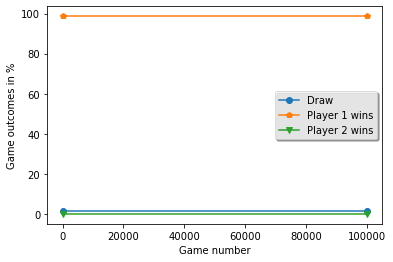

In [30]:

eval_players(AlphaBetaAgent(), defaultPlayer(),1)

After 100000 game we have draws: 18766, Player 1 wins: 0, and Player 2 wins: 81234.
Which gives percentages of draws: 18.77%, Player 1 wins: 0.00%, and Player 2 wins:  81.23%


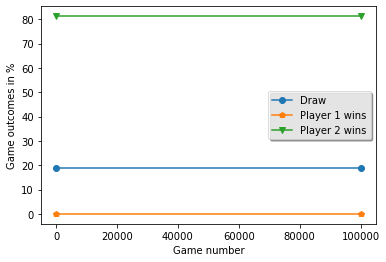

In [23]:
eval_players(defaultPlayer(),AlphaBetaAgent(),1)